<a href="https://colab.research.google.com/github/LIvanoff/moscow_clusters/blob/main/moscow_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans

In [3]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import time 

In [4]:
import pandas as pd

In [6]:
houses = pd.read_excel('geo_houses_v2.xlsx')

In [7]:
houses = houses.drop('district', axis=1)
houses

,address,latitude,longitude
0,"Москва, шоссе Ленинградское 35",56.333760,36.711539
1,"Москва, шоссе Ленинградское 42",56.333408,36.711146
2,"Москва, шоссе Ленинградское 46",56.333408,36.711146
3,"Москва, шоссе Ленинградское 29",56.333290,36.711224
4,"Москва, шоссе Ленинградское 33",56.333026,36.711386
...,...,...,...
31460,"Москва, улица Добролюбова 17",55.082797,38.772286
31461,"Москва, улица Весенняя 8",55.063867,38.755697
31462,"Москва, улица Шоссейная 50 к1",55.056238,38.813698
31463,"Москва, улица Планетная 25",55.034828,38.615463


In [8]:
latitude = houses['latitude'].tolist()
longitude = houses['longitude'].tolist()
latlong = []
size = int(len(latitude))
print(size)
for i in range(0, size):
    latlong.append([longitude[i],latitude[i]])
np_latlong = np.asarray(latlong)
print(type(np_latlong))

31465
<class 'numpy.ndarray'>


In [9]:
X = np.vstack(np_latlong)

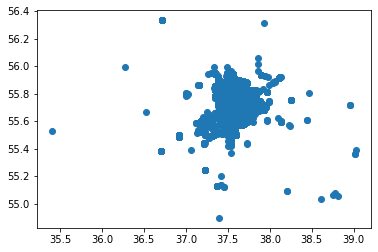

In [10]:
plt.scatter(X[:,0],X[:,1], marker='o')

In [ ]:
count = 0
start_time = time.time()
for i in range(1,31465):
    point = Point(longitude[i], latitude[i])
    polygon = Polygon([(35, 54), (35, 56.4), (40, 56.4), (40, 54)])
    print(polygon.contains(point))
    count +=1
print("--- %s seconds ---" % (time.time() - start_time))
print(count)

In [15]:
start_time = time.time()
k_means = KMeans(n_clusters=1000)
moskva = k_means.fit_predict(X)
print("--- %s seconds ---" % (time.time() - start_time))
plt.figure(figsize=(40, 30), dpi=300)
plt.scatter(X[:, 0], X[:, 1], c=moskva,s=1)
plt.title('K-Means')
plt.show()

--- 65.51863861083984 seconds ---
